# AAG05- Braulio e Christian

In [82]:
#importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

$ Metodos\ Quantitativos\ em\ Ciencias\ da\ Computação\ -\ 2019-3$

$Alunos:\ Braulio\ Silva\ Mendes\ Lucas\ -\ 5°\ Periodo\ de\ Sistemas\ de\ Informação\\ Christian\ Scoralich\ -\ 3°\ Periodo\ de\ Ciências\ da\ Computação$

In [57]:
# Leitura do csv.
df=pd.read_csv("C:\\Users\\chris\\AAGG05\\weight-height.csv")
# Imprimir as 5 primeiras linhas do csv.
df.head()
# Armazeno as colunas em váriaveis
gender = df['Gender']
height = df['Height']
weight = df['Weight']
heightFemale = []
weightFemale = []
heightMale = []
weightMale = []
# separo a altura e peso de por gênero
for g,w,h in zip(gender,height,weight):
    if(g == 'Male'):
        heightMale.append(float(h))
        weightMale.append(float(w))
    if(g == 'Female'):
        heightFemale.append(float(h))
        weightFemale.append(float(w))

Para a amostra bivariavel escolhi uma amostra que contém a altura e peso de mais de 5000 homens e mulheres7
Vou analisar se existe correlação entre peso e altura dos homens

In [58]:
#coloco o peso e altura em uma matriz
heightMale.sort()
weightMale.sort()
xy = [heightMale,weightMale]

In [59]:
#analise de correlação
r = np.corrcoef(xy)
print(r)

[[1.         0.99964343]
 [0.99964343 1.        ]]


Como r > 0 então a medida que x cresce, y também cresce. E como quase 1, se arredondar fica 1 podemos dizer que a correção é forte/perfeita. Portando podemos seguir para o passo 3.

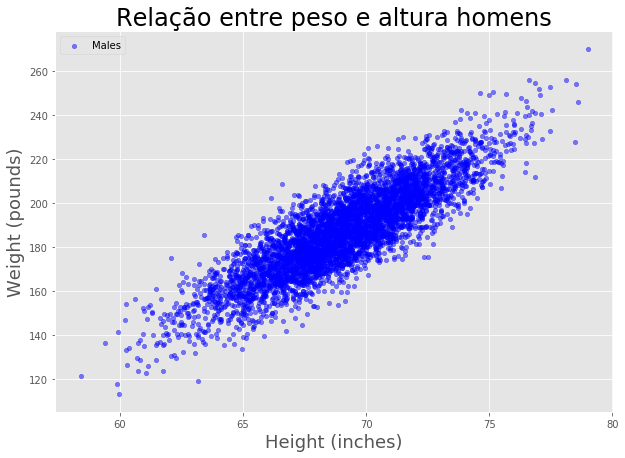

In [101]:
# teste visual de pressupostos

ax1= df[gender =='Male'].plot(kind='scatter', x='Height',y='Weight', color='blue',alpha=0.5, figsize=(10,7))
plt.legend(labels=['Males'])
plt.title('Relação entre peso e altura homens', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);
df_males = df[df['Gender']=='Male']

male_fit = np.polyfit(df_males.Height,df_males.Weight,1)

Irei utilizar o searborn para plotar já que com ele consigo trabalhar com menos linhas e melhorar a visualização

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


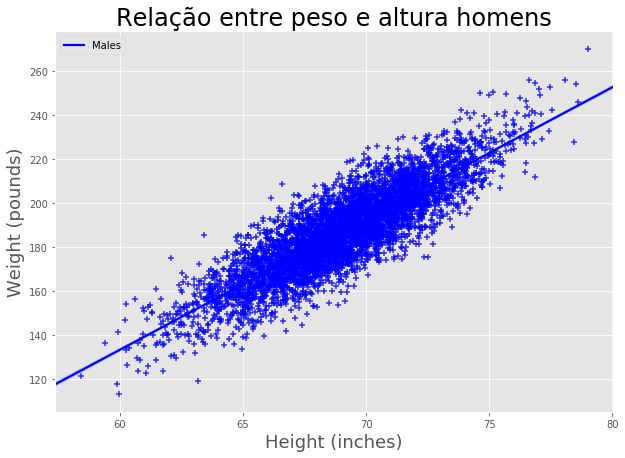

In [102]:
fig = plt.figure(figsize=(10,7))
sns.regplot(x=df_males.Height,y=df_males.Weight,color='blue', marker='+')

plt.legend(labels=['Males'])
plt.title('Relação entre peso e altura homens', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

Para melhorar a visualização irei selecionar 300 amostras selecionadas aleatoriamente

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


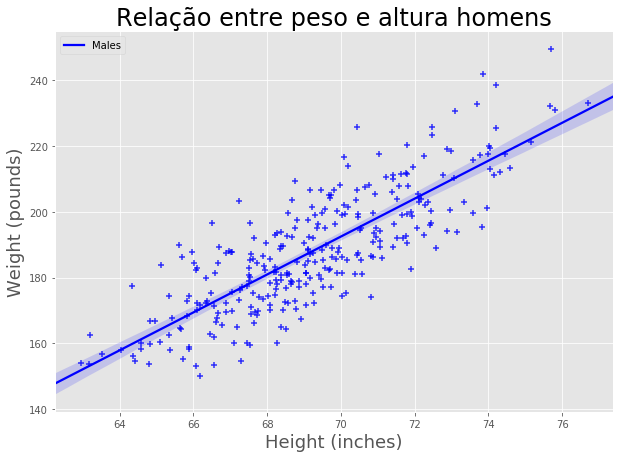

In [99]:
df_males_sample= df[df['Gender']=='Male'].sample(300)

fig = plt.figure(figsize=(10,7))
sns.regplot(x=df_males_sample.Height,y=df_males_sample.Weight,color='blue', marker='+')

plt.legend(labels=['Males'])
plt.title('Relação entre peso e altura homens', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

O teste de linearidade mostra visualmente uma forte correlação. O teste de linearidade conclui que a amostra é linear

Como não há nenhuma tendência visível, então conclui-se que tem uma independência de erros

No teste de homocedasticidade há uma tendência de espalhamento

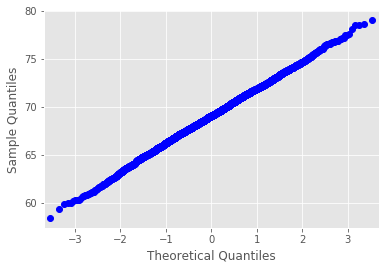

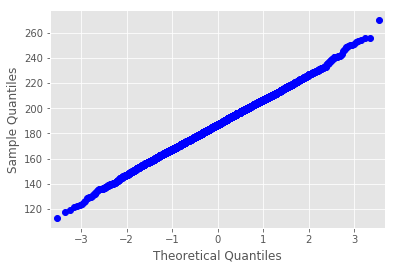

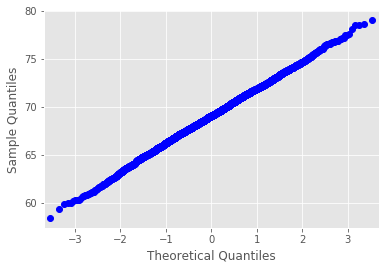

In [96]:
#erros normais
a = np.array(heightMale)
b = np.array(weightMale)
sm.qqplot(a)
sm.qqplot(b)

Os erros são normais já que os pontos plotados se aproximam da reta normal

In [83]:
#teste T
t, p = stats.ttest_ind(heightMale,weightMale)
print("t:",t,"\np", p)

t: 417.43743714646797 
p 0.0


Dessa vez deu um t positivo hahahaaha oleeee, como o P = 0 então quer dizer que não existe chance alguma da diferença ser ao acaso

In [84]:
#teste Qui-quadrado
x2 = stats.chisquare(heightMale,weightMale)
print(x2)

Power_divergenceResult(statistic=1019032.8816493683, pvalue=0.0)


Temos aqui uma significancia máxima, também né peguei uma amostra topzeira